# Example 01. Gridding of the scan data

This example generates grids in spherical and scan coordinate systems

## Load all the required modules

In [1]:
import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MaxNLocator

from riegl_canopy import riegl_io, grid

## Some plotting functions

In [2]:
def plot_riegl_grid(data, label='Range (m)', clim=[0,30], figsize=(16,10), nbins=10, 
                    cmap='bone', nreturns=None, extend='max', nodata=-9999, spherical=False):
    """Example function to plot a RIEGL grid"""
    if nreturns is None:
        nreturns = data.shape[0]
    fig, ax = plt.subplots(ncols=1, nrows=nreturns, squeeze=False, 
                           sharex=True, sharey=True, figsize=figsize)
    with plt.style.context('seaborn-notebook'):
        for i in range(nreturns):  
            ax[i,0].set_facecolor('white')
            ax[i,0].set(adjustable='box', aspect='equal')
            if spherical:
                extent = [0,360,180,0]
                ax[i,0].set(xlabel='Azimuth', ylabel='Zenith')
            else:
                ax[i,0].get_xaxis().set_visible(False)
                ax[i,0].get_yaxis().set_visible(False)
                extent = None
            tmp = np.ma.masked_equal(data[i], nodata)
            p = ax[i,0].imshow(tmp, interpolation='nearest', clim=clim, 
                               cmap=matplotlib.cm.get_cmap(cmap,nbins),  
                               vmin=clim[0], vmax=clim[1], extent=extent)
            divider = make_axes_locatable(ax[i,0])
            cax = divider.append_axes('right', size='2%', pad=0.05)
            cbar = fig.colorbar(p, label=label, cax=cax, extend=extend)
            cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=nbins))
    fig.tight_layout()
    plt.show()


## Identify all of the input files

In [3]:
os.chdir('/gpfs/data1/vclgp/armstonj/tls_temp/2021-07-18.003.RiSCAN')

rxp_fn = 'SCANS/ScanPos001/SINGLESCANS/210718_115347.rxp'
rdbx_fn = 'project.rdb/SCANS/ScanPos001/SINGLESCANS/210718_115347/210718_115347.rdbx'
transform_fn = 'ScanPos001.DAT'

## Grid and visualize the scan data

### Scan coordinate system

In [4]:
reflectance_grid = grid.grid_rdbx_scan(rdbx_fn, attribute='reflectance')

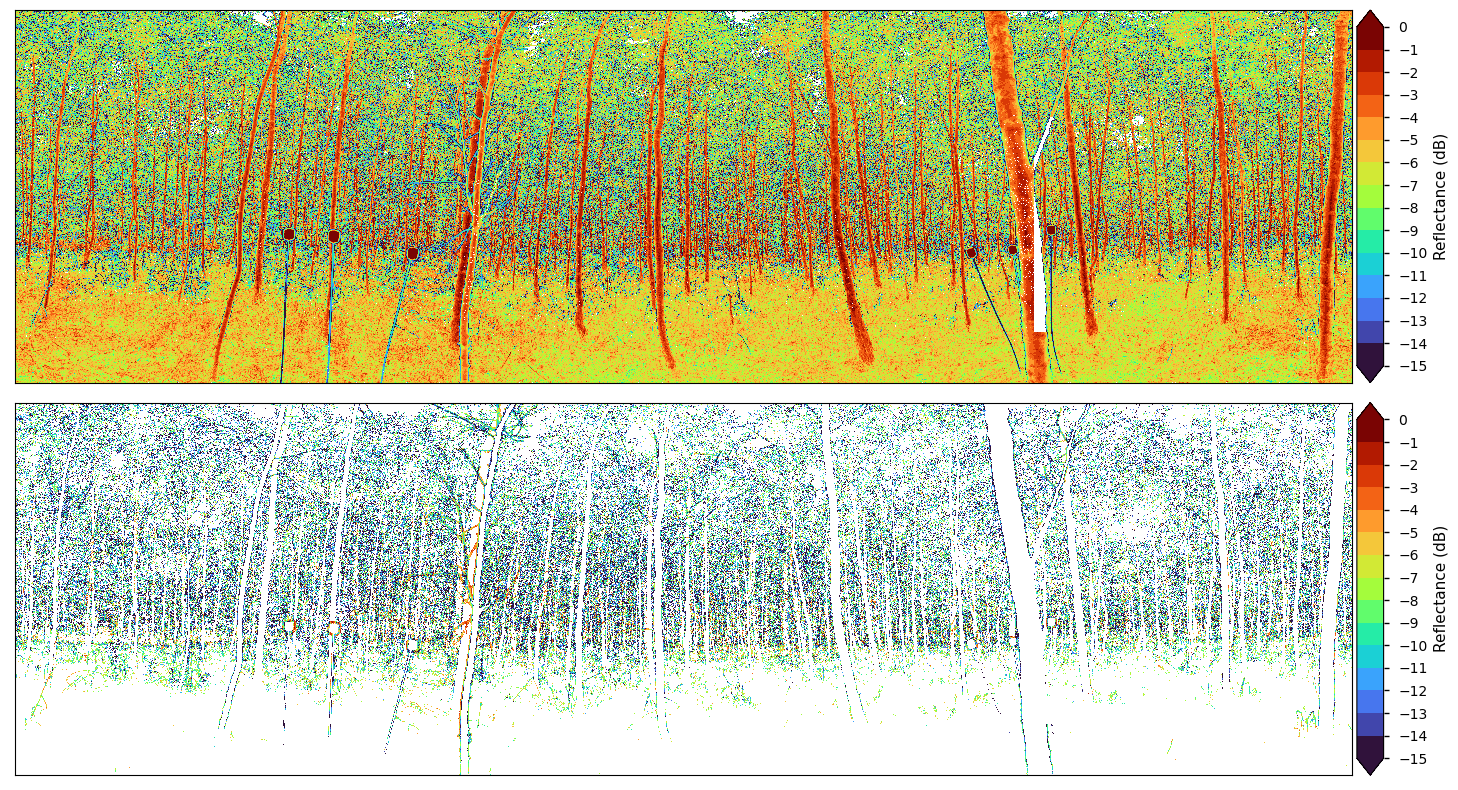

In [5]:
plot_riegl_grid(reflectance_grid, label='Reflectance (dB)', nreturns=2, clim=[-15,0],
                figsize=(16,8), nbins=15, cmap='turbo', extend='both')

In [6]:
count_grid = grid.grid_rxp_scan(rxp_fn, attribute='target_count')

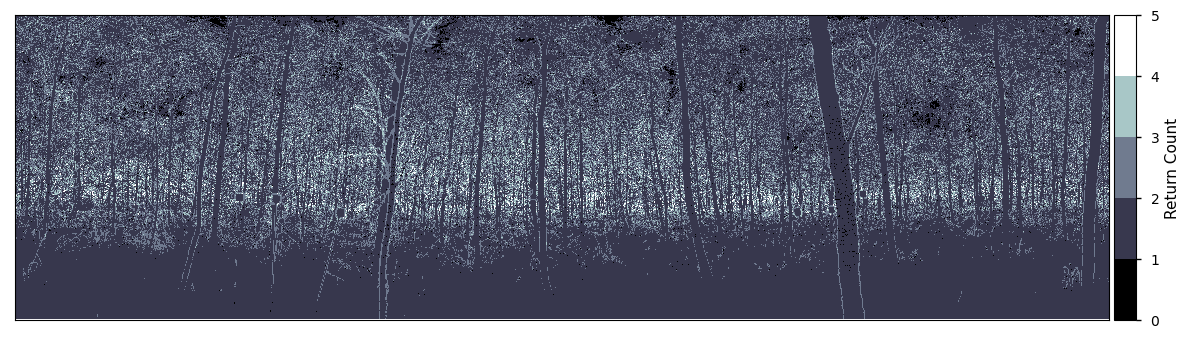

In [7]:
plot_riegl_grid(count_grid, label='Return Count', clim=[0,5], figsize=(12,8), 
                nbins=5, cmap='bone', extend='neither')

### Spherical coordinate system

In [8]:
range_grid = grid.grid_rdbx_spherical(rdbx_fn, transform_fn, 0.1, attribute='range', first_only=True)

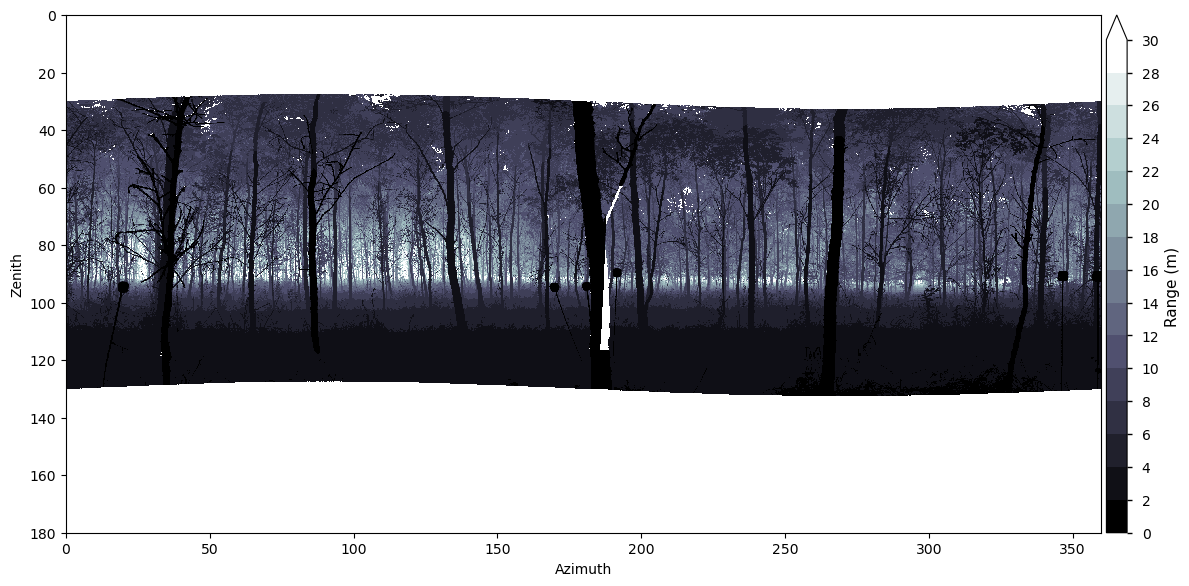

In [9]:
plot_riegl_grid(range_grid, label='Range (m)', clim=[0,30], figsize=(12,8), nbins=15, cmap='bone', spherical=True)

In [10]:
zenith_grid = grid.grid_rxp_spherical(rxp_fn, transform_fn, 0.1, attribute='zenith')

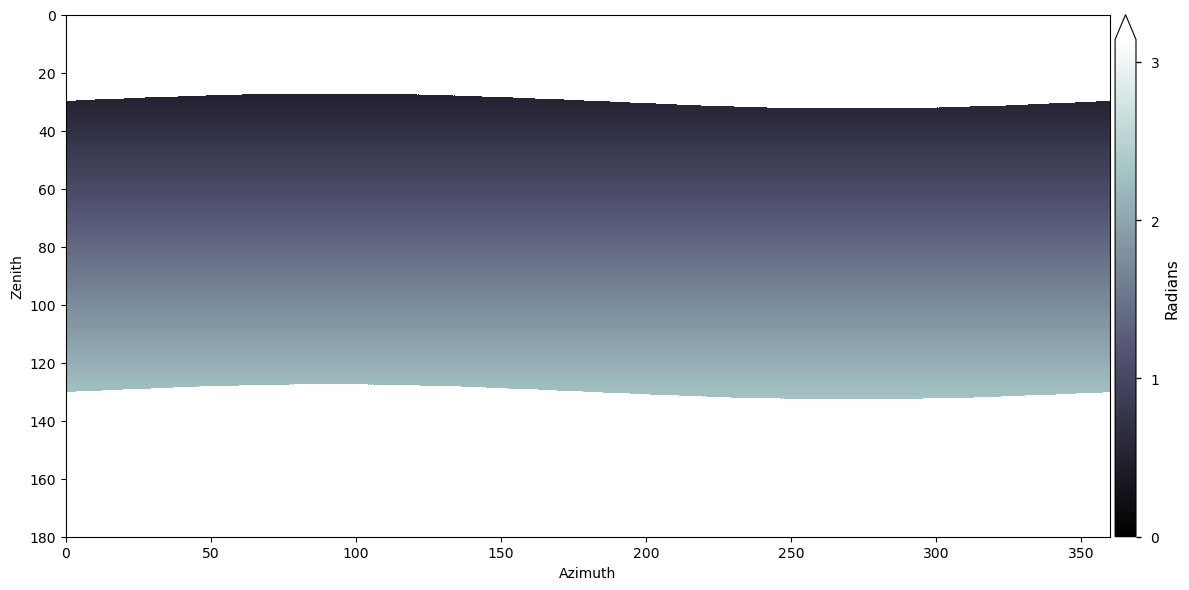

In [11]:
plot_riegl_grid(zenith_grid, label='Radians', clim=[0,np.pi], figsize=(12,8), nbins=100, cmap='bone', spherical=True)